<a href="https://colab.research.google.com/github/hafizMfawad/MachineLearning/blob/main/Language_detection_ML_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import time

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Language_Detection/dataset.csv")

**Q#01. How big is the data?**

In [ ]:
data.shape

(22000, 2)

**Q#02. How does the data looks like?**

In [ ]:
data.head() #it just fetch the first five rows from the data
#data.sample(5) #it randomly fetch the five rows from the data and it is recommended to see the data un biased

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


**Q#03 Are there any missing value?**

In [ ]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [ ]:
data["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [ ]:
x = np.array(data["Text"])
y = np.array(data["language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

***1) Naive Baye's ***

In [ ]:
model = MultinomialNB()
start_time = time.time()
model.fit(X_train,y_train)
elapsed_time = time.time() - start_time
accuracy = model.score(X_test, y_test)
print('Time taken for classification:', elapsed_time, 'seconds')
print("Naive Baye's Accuracy:", accuracy)


Time taken for classification: 0.39579129219055176 seconds
Naive Baye's Accuracy: 0.952892561983471


**Confusion Matrix for the Naive Baye's**

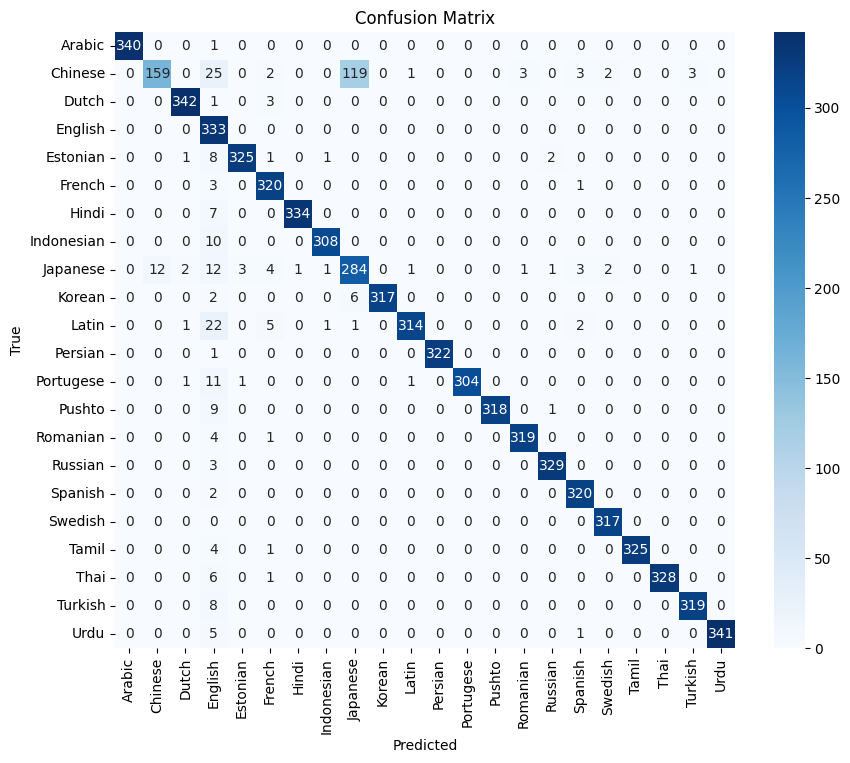

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)               #For Naive Baye's Model
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


**Classification Report and analysis**

In [ ]:
y_pred = model.predict(X_test)            # for Naive Baye's Model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       341
     Chinese       0.93      0.50      0.65       317
       Dutch       0.99      0.99      0.99       346
     English       0.70      1.00      0.82       333
    Estonian       0.99      0.96      0.97       338
      French       0.95      0.99      0.97       324
       Hindi       1.00      0.98      0.99       341
  Indonesian       0.99      0.97      0.98       318
    Japanese       0.69      0.87      0.77       328
      Korean       1.00      0.98      0.99       325
       Latin       0.99      0.91      0.95       346
     Persian       1.00      1.00      1.00       323
   Portugese       1.00      0.96      0.98       318
      Pushto       1.00      0.97      0.98       328
    Romanian       0.99      0.98      0.99       324
     Russian       0.99      0.99      0.99       332
     Spanish       0.97      0.99      0.98       322
   

**Sample Prediction**

In [ ]:
import random
import numpy as np
random.seed(42)
X_test_array = X_test.toarray()  # Convert X_test to a dense array
sample_indices = random.sample(range(X_test_array.shape[0]), k=5)
for idx in sample_indices:
    sample_text = x[idx]
    true_label = y_test[idx]
    predicted_label = model.predict(X_test_array[idx].reshape(1, -1))
    print("Sample Text:", sample_text)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("-" * 30)

Sample Text: farrington foi nomeado para várias posições de destaque membro do painel de ciências na pesquisa da carreira criminosa da academia nacional dos estados unidos co-presidente do grupo de estudo de delinquentes jovens do escritório americano de justiça juvenil e prevenção de delinquência presidente da sociedade americana de criminologia da associação europeia de psicologia e lei além de outras também foi presidente da sociedade britânica de criminologia
True Label: Russian
Predicted Label: ['Russian']
------------------------------
Sample Text: такер гейтс — американский телережиссёр и продюсер он был режиссёром нескольких эпизодов сериалов канала abc «шпионка» и «остаться в живых» он также был режиссёром ряда эпизодов сериалов «дурман» «карнавал» «пойнт-плезант» «хафф» «юристы бостона» «город пришельцев» «братья и сёстры» «родина» и «парки и зоны отдыха»
True Label: Korean
Predicted Label: ['Korean']
------------------------------
Sample Text: o palácio do luxemburgo palais 

***Testing the Model By giving a new un-seen Input ***

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print("Predicted Language: ",output)


Enter a Text: hahaha
Predicted Language:  ['Chinese']


**2)SVM Model**

In [ ]:
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC()
start_time = time.time()
svm_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy_svm = svm_model.score(X_test, y_test)
print('Time taken for classification:', elapsed_time, 'seconds')
print("SVM Accuracy:", accuracy_svm)


Time taken for classification: 56.203694343566895 seconds
SVM Accuracy: 0.8944903581267217


**Confusion Matrix**

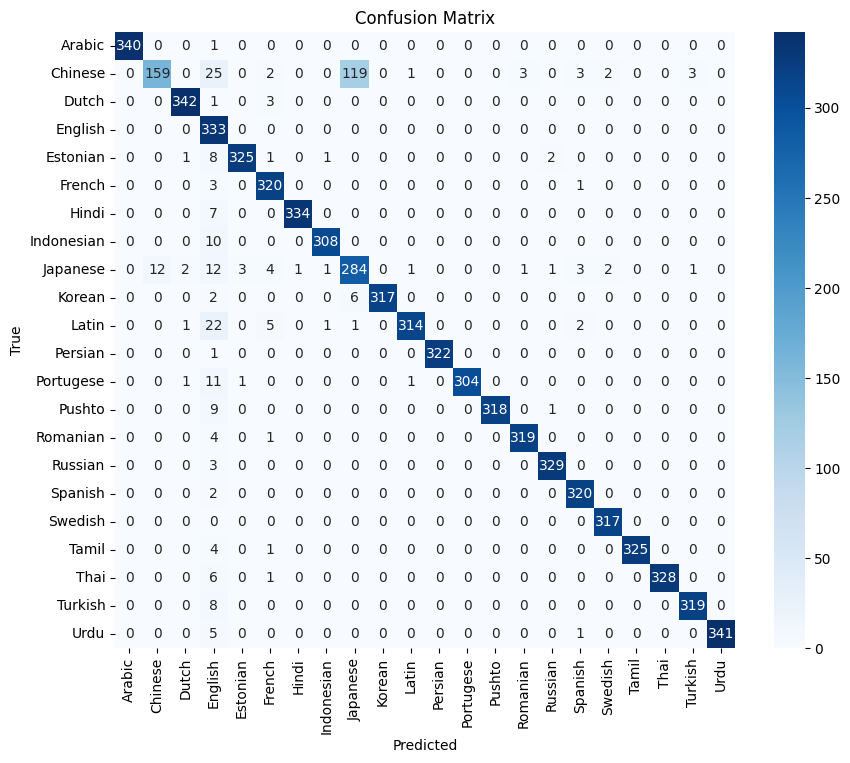

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)         #For SVM Model
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [ ]:
y_pred = svm_model.predict(X_test)         # for SVM Model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       341
     Chinese       0.49      0.32      0.39       317
       Dutch       1.00      0.93      0.97       346
     English       0.83      0.93      0.88       333
    Estonian       1.00      0.91      0.95       338
      French       0.97      0.94      0.95       324
       Hindi       1.00      0.91      0.96       341
  Indonesian       1.00      0.94      0.97       318
    Japanese       0.45      0.92      0.61       328
      Korean       0.91      0.90      0.90       325
       Latin       0.97      0.88      0.92       346
     Persian       1.00      0.92      0.96       323
   Portugese       0.98      0.93      0.96       318
      Pushto       0.65      0.95      0.77       328
    Romanian       1.00      0.94      0.97       324
     Russian       0.99      0.84      0.91       332
     Spanish       0.99      0.95      0.97       322
   

**Sample Prediction**

In [ ]:
import random
import numpy as np
random.seed(42)
X_test_array = X_test.toarray()  # Convert X_test to a dense array
sample_indices = random.sample(range(X_test_array.shape[0]), k=5)
for idx in sample_indices:
    sample_text = x[idx]
    true_label = y_test[idx]
    predicted_label = svm_model.predict(X_test_array[idx].reshape(1, -1))
    print("Sample Text:", sample_text)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("-" * 30)

Sample Text: farrington foi nomeado para várias posições de destaque membro do painel de ciências na pesquisa da carreira criminosa da academia nacional dos estados unidos co-presidente do grupo de estudo de delinquentes jovens do escritório americano de justiça juvenil e prevenção de delinquência presidente da sociedade americana de criminologia da associação europeia de psicologia e lei além de outras também foi presidente da sociedade britânica de criminologia
True Label: Russian
Predicted Label: ['Chinese']
------------------------------
Sample Text: такер гейтс — американский телережиссёр и продюсер он был режиссёром нескольких эпизодов сериалов канала abc «шпионка» и «остаться в живых» он также был режиссёром ряда эпизодов сериалов «дурман» «карнавал» «пойнт-плезант» «хафф» «юристы бостона» «город пришельцев» «братья и сёстры» «родина» и «парки и зоны отдыха»
True Label: Korean
Predicted Label: ['Korean']
------------------------------
Sample Text: o palácio do luxemburgo palais 

**Testing the model by giving an un-seen input data**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = svm_model.predict(data)
print("Predicted Language: ",output)

**3) Linear SVC Classifier**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# Load the dataset
# Convert the "Text" column to strings
data["Text"] = data["Text"].astype(str)
x = data["Text"]
y = data["language"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33,random_state=42)

# Initialize the vectorizer (BoW)
cv = CountVectorizer()
x_train_features = cv.fit_transform(X_train)
x_test_features = cv.transform(X_test)

# Apply feature selection
feature_selector = SelectKBest(score_func=chi2, k=5000)  # Select top 5000 features
x_train_features_selected = feature_selector.fit_transform(x_train_features, y_train)
x_test_features_selected = feature_selector.transform(x_test_features)

# Convert language labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the classifier (LinearSVC)
linear_classifier_model = LinearSVC()
start_time = time.time()
linear_classifier_model.fit(x_train_features_selected, y_train_encoded)
elapsed_time = time.time() - start_time

# Evaluate the classifier
accuracy = linear_classifier_model.score(x_test_features_selected, y_test_encoded)
print('Time taken for classification:', elapsed_time, 'seconds')
print("Accuracy:", accuracy)

Time taken for classification: 2.242811441421509 seconds
Accuracy: 0.9402203856749312


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Confusion Matrix**

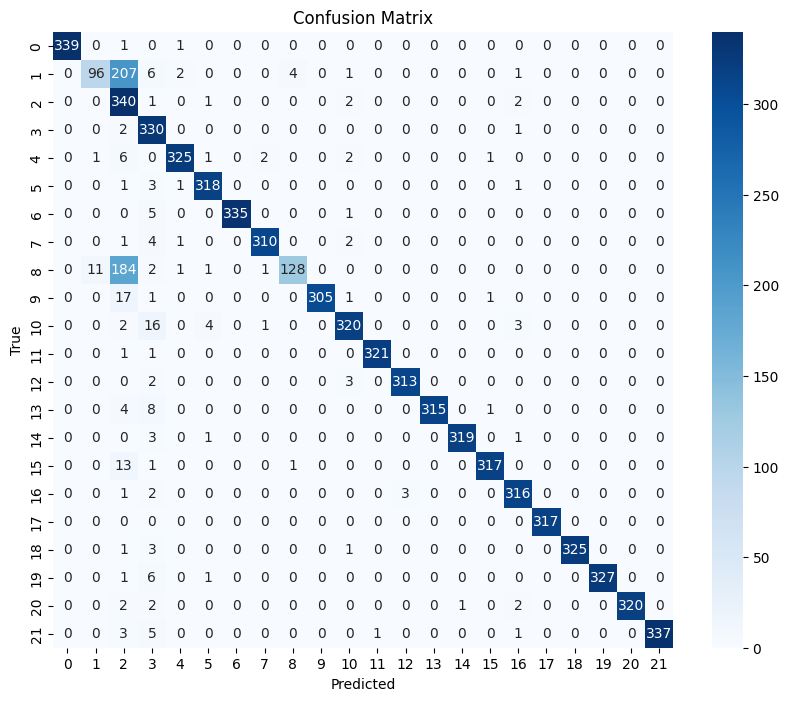

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=linear_classifier_model.classes_, yticklabels=linear_classifier_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
y_pred =linear_classifier_model.predict(x_test_features_selected)         # for Linear SVM Model
report = classification_report(y_test_encoded , y_pred) # for Linear SVM Model
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       341
           1       0.51      0.95      0.67       317
           2       0.99      0.99      0.99       346
           3       0.91      0.89      0.90       333
           4       0.96      0.96      0.96       338
           5       0.98      0.97      0.97       324
           6       0.99      0.98      0.99       341
           7       0.98      0.97      0.98       318
           8       0.86      0.35      0.50       328
           9       1.00      0.94      0.97       325
          10       0.93      0.93      0.93       346
          11       0.99      0.99      0.99       323
          12       0.98      0.99      0.98       318
          13       0.97      0.96      0.96       328
          14       0.99      0.98      0.99       324
          15       0.99      0.95      0.97       332
          16       0.98      0.98      0.98       322
   

**Sample Prediction**

In [ ]:
import random
import numpy as np
import pandas as pd

random.seed(42)
X_test_array = x_test_features_selected.toarray()  # Convert x_test_features_selected to a dense array
sample_indices = random.sample(range(X_test_array.shape[0]), k=5)

for idx in sample_indices:
    if idx < len(X_test):
        sample_text = x_test_features[idx]
        true_label = y_test[idx]
        predicted_label = linear_classifier_model.predict(X_test_array[idx].reshape(1, -1))

        print("Sample Text:", sample_text)
        print("True Label:", true_label)
        print("Predicted Label:", label_encoder.inverse_transform(predicted_label))
        print("-" * 30)
    else:
        print("Invalid index:", idx)


**Testing the model by giving an un-seen input data**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
user_features = cv.transform([user])
user_features_selected = feature_selector.transform(user_features)
prediction = linear_classifier_model.predict(user_features_selected)
predicted_language = label_encoder.inverse_transform(prediction)
print("Predicted Language:", predicted_language)

Enter a Text: how are you doin all good or not
Predicted Language: ['Chinese']


**4) Logistic Regression Model**

In [ ]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()
# Train the model
start_time = time.time()
logistic_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
# Evaluate the model
accuracy = logistic_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Time:", elapsed_time)

Logistic Regression Accuracy: 0.9414600550964187
Logistic Regression Time: 128.28802466392517


**Confusion Matrix**

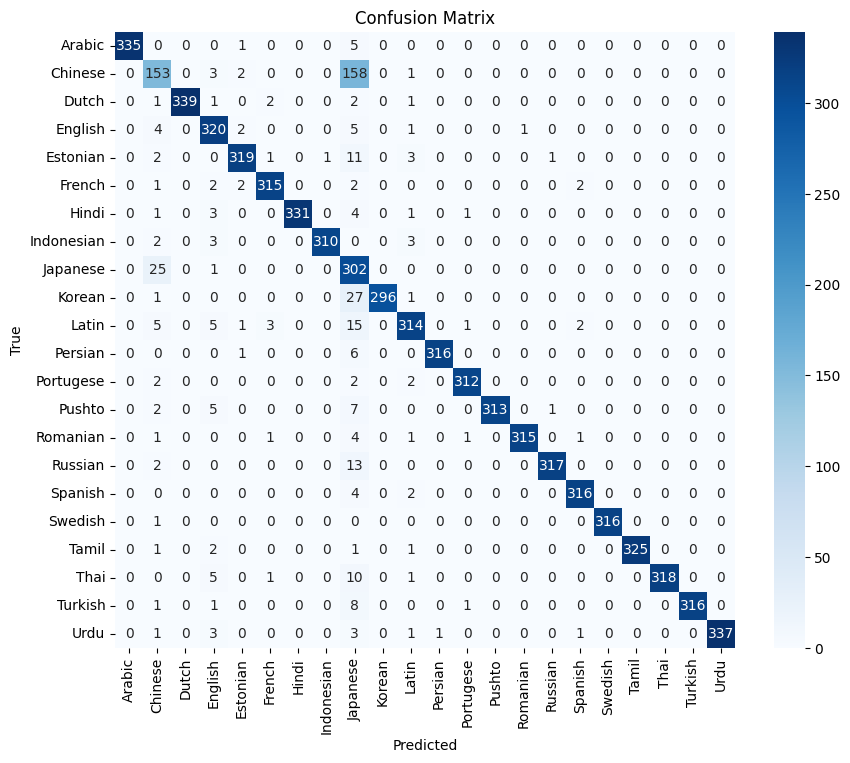

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)      #For Logistic Model
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Classification report**

In [ ]:
y_pred =logistic_model.predict(X_test)         # for logistic Model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       341
     Chinese       0.74      0.48      0.59       317
       Dutch       1.00      0.98      0.99       346
     English       0.90      0.96      0.93       333
    Estonian       0.97      0.94      0.96       338
      French       0.98      0.97      0.97       324
       Hindi       1.00      0.97      0.99       341
  Indonesian       1.00      0.97      0.99       318
    Japanese       0.51      0.92      0.66       328
      Korean       1.00      0.91      0.95       325
       Latin       0.94      0.91      0.92       346
     Persian       1.00      0.98      0.99       323
   Portugese       0.99      0.98      0.98       318
      Pushto       1.00      0.95      0.98       328
    Romanian       1.00      0.97      0.98       324
     Russian       0.99      0.95      0.97       332
     Spanish       0.98      0.98      0.98       322
   

**Sample Testing**

In [ ]:
import random
import numpy as np
random.seed(42)
X_test_array = X_test.toarray()  # Convert X_test to a dense array
sample_indices = random.sample(range(X_test_array.shape[0]), k=5)
for idx in sample_indices:
    sample_text = x[idx]
    true_label = y_test[idx]
    predicted_label = logistic_model.predict(X_test_array[idx].reshape(1, -1))
    print("Sample Text:", sample_text)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("-" * 30)

Sample Text: farrington foi nomeado para várias posições de destaque membro do painel de ciências na pesquisa da carreira criminosa da academia nacional dos estados unidos co-presidente do grupo de estudo de delinquentes jovens do escritório americano de justiça juvenil e prevenção de delinquência presidente da sociedade americana de criminologia da associação europeia de psicologia e lei além de outras também foi presidente da sociedade britânica de criminologia
True Label: Russian
Predicted Label: ['Japanese']
------------------------------
Sample Text: такер гейтс — американский телережиссёр и продюсер он был режиссёром нескольких эпизодов сериалов канала abc «шпионка» и «остаться в живых» он также был режиссёром ряда эпизодов сериалов «дурман» «карнавал» «пойнт-плезант» «хафф» «юристы бостона» «город пришельцев» «братья и сёстры» «родина» и «парки и зоны отдыха»
True Label: Korean
Predicted Label: ['Korean']
------------------------------
Sample Text: o palácio do luxemburgo palais

**Predicting the model from un-seen data input**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = logistic_model.predict(data)
print("Predicted Language: ",output)

**5) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier()

# Train the model
start_time = time.time()
random_forest_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = random_forest_model.score(X_test, y_test)
print('Time taken for classification:', elapsed_time, 'seconds')
print("Random Forest Accuracy:", accuracy)

Time taken for classification: 156.64631295204163 seconds
Random Forest Accuracy: 0.9191460055096419


**Data Framing in Random Forest**

In [ ]:
# Get the transformed feature matrix as a DataFrame
feature_matrix = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
# Add the language column to the feature matrix
feature_matrix["Language"] = y
# Display the transformed features for random samples
num_samples = 1
random_indices = np.random.choice(feature_matrix.shape[0], num_samples, replace=False)
for i in random_indices:
    sample_features = feature_matrix.iloc[i, :]
    non_zero_features = sample_features[sample_features != 0]

    sample_data = pd.DataFrame({'Index': non_zero_features.index,
                                'Language': sample_features['Language'],
                                'Feature': non_zero_features.index,
                                'Count': non_zero_features.values})

    print("Sample", i+1)
    print(sample_data.to_string(index=False))
    print()

Sample 20359
     Index Language    Feature Count
        ac    Dutch         ac     1
       and    Dutch        and     1
   babcock    Dutch    babcock     1
    beyond    Dutch     beyond     1
  columbia    Dutch   columbia     1
     deeds    Dutch      deeds     1
      done    Dutch       done     1
        ea    Dutch         ea     1
        en    Dutch         en     1
    engels    Dutch     engels     1
       het    Dutch        het     1
   history    Dutch    history     1
        in    Dutch         in     1
      krey    Dutch       krey     1
        of    Dutch         of     1
     press    Dutch      press     1
       sea    Dutch        sea     1
       the    Dutch        the     1
     tyrus    Dutch      tyrus     1
uitgegeven    Dutch uitgegeven     1
university    Dutch university     1
       van    Dutch        van     1
  vertaald    Dutch   vertaald     1
    willem    Dutch     willem     1
  Language    Dutch   Language Dutch



In [ ]:
#print(len(random_forest_model.estimators_))
print("Number of trees in the Random Forest:", len(random_forest_model.estimators_))

Number of trees in the Random Forest: 100


*** Random Decision Tree in Random Forest***

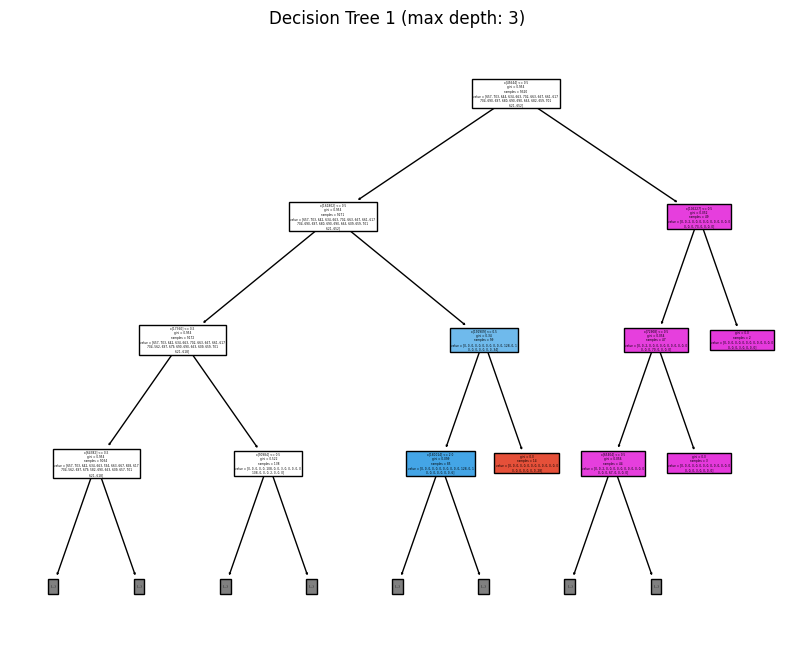

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Access the first tree from the Random Forest ensemble
tree = random_forest_model.estimators_[5]
# Set the maximum depth of the tree
max_depth = 3
# Visualize the first tree
plt.figure(figsize=(10, 8))
plot_tree(tree, filled=True, max_depth=max_depth)
plt.title("Decision Tree 1 (max depth: {})".format(max_depth))
plt.show()

**Confusion Matrix**

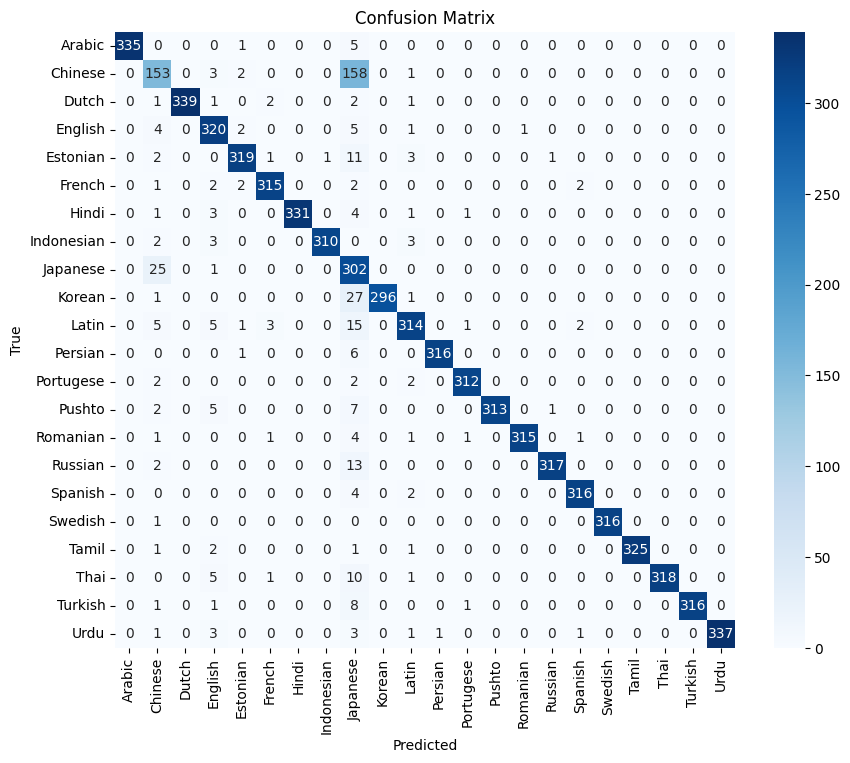

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [ ]:
y_pred =random_forest_model.predict(X_test)         # for random forest Model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       341
     Chinese       0.89      0.30      0.45       317
       Dutch       0.43      0.98      0.60       346
     English       0.82      0.99      0.90       333
    Estonian       0.98      0.96      0.97       338
      French       0.97      0.98      0.98       324
       Hindi       1.00      0.98      0.99       341
  Indonesian       0.99      0.97      0.98       318
    Japanese       0.96      0.39      0.56       328
      Korean       1.00      0.94      0.97       325
       Latin       0.96      0.92      0.94       346
     Persian       1.00      0.99      1.00       323
   Portugese       0.99      0.98      0.99       318
      Pushto       1.00      0.96      0.98       328
    Romanian       1.00      0.98      0.99       324
     Russian       0.99      0.95      0.97       332
     Spanish       0.96      0.98      0.97       322
   

**Sample Predictions**

In [ ]:
import random
import numpy as np

random.seed(42)
X_test_array = X_test.toarray()  # Convert X_test to a dense array
sample_indices = random.sample(range(X_test_array.shape[0]), k=5)
for idx in sample_indices:
    sample_text = x[idx]
    true_label = y_test[idx]
    predicted_label = random_forest_model.predict(X_test_array[idx].reshape(1, -1))
    print("Sample Text:", sample_text)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("-" * 30)

Sample Text: farrington foi nomeado para várias posições de destaque membro do painel de ciências na pesquisa da carreira criminosa da academia nacional dos estados unidos co-presidente do grupo de estudo de delinquentes jovens do escritório americano de justiça juvenil e prevenção de delinquência presidente da sociedade americana de criminologia da associação europeia de psicologia e lei além de outras também foi presidente da sociedade britânica de criminologia
True Label: Russian
Predicted Label: ['Dutch']
------------------------------
Sample Text: такер гейтс — американский телережиссёр и продюсер он был режиссёром нескольких эпизодов сериалов канала abc «шпионка» и «остаться в живых» он также был режиссёром ряда эпизодов сериалов «дурман» «карнавал» «пойнт-плезант» «хафф» «юристы бостона» «город пришельцев» «братья и сёстры» «родина» и «парки и зоны отдыха»
True Label: Korean
Predicted Label: ['Korean']
------------------------------
Sample Text: o palácio do luxemburgo palais du

**Predicting the model by giving un-seen data input**

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = random_forest_model.predict(data)
print("Predicted Language: ",output)

Enter a Text: El uso del aprendizaje automático para la identificación de idiomas era una tarea difícil hace algunos años porque no había muchos datos sobre los idiomas, pero con la disponibilidad de datos con facilidad, ya están disponibles varios modelos potentes de aprendizaje automático para la identificación de idiomas. Espero que te haya gustado este artículo sobre la detección de idiomas con aprendizaje automático usando Python. Siéntase libre de hacer sus valiosas preguntas en la sección de comentarios a continuación.
Predicted Language:  ['Spanish']
